In [32]:
import random
import numpy as np
import tensorflow as tf

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [33]:
import os
import json
import cv2
from zipfile import ZipFile
from PIL import Image

from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [28]:
!pip install kaggle

In [29]:
# Loading Kaggle json file and setting up Kaggle credentials as environment variables

kaggle_credentials = json.load(open('kaggle.json'))
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [34]:
# Downloading Plant Disease dataset

!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [30]:
!ls

kaggle.json  plantvillage-dataset.zip  sample_data


In [31]:
# Unziping the downloaded dataset

with ZipFile('plantvillage-dataset.zip', 'r') as zipObj:
   zipObj.extractall()

In [35]:
dataset_path = "plantvillage dataset"

color_dataset_path = "plantvillage dataset/color"

In [36]:
print("Main folders in dataset:")
print(os.listdir(dataset_path))
print("-" * 50)

# Explore each version of the dataset
for version in ["segmented", "color", "grayscale"]:
    version_path = os.path.join(dataset_path, version)

    # Get all class folders inside this version
    class_folders = os.listdir(version_path)

    print(f"{version.upper()} dataset:")
    print(f"  Number of classes: {len(class_folders)}")
    print(f"  Sample class names: {class_folders[:5]}")
    print("-" * 50)

Main folders in dataset:
['grayscale', 'color', 'segmented']
--------------------------------------------------
SEGMENTED dataset:
  Number of classes: 38
  Sample class names: ['Tomato___Septoria_leaf_spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Strawberry___Leaf_scorch', 'Soybean___healthy']
--------------------------------------------------
COLOR dataset:
  Number of classes: 38
  Sample class names: ['Tomato___Septoria_leaf_spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Strawberry___Leaf_scorch', 'Soybean___healthy']
--------------------------------------------------
GRAYSCALE dataset:
  Number of classes: 38
  Sample class names: ['Tomato___Septoria_leaf_spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Strawberry___Leaf_scorch', 'Soybean___healthy']
--------------------------------------------------


In [37]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))

423


In [38]:
# Image Distribution of various classes

# Count images per class in color dataset
class_counts = {cls: len(os.listdir(os.path.join(color_dataset_path, cls)))
                for cls in os.listdir(color_dataset_path)}

# First 10 categories
for cls, count in list(sorted(class_counts.items()))[:10]:
    print(f"\n{cls:25} → {count} images")


Apple___Apple_scab        → 630 images

Apple___Black_rot         → 621 images

Apple___Cedar_apple_rust  → 275 images

Apple___healthy           → 1645 images

Blueberry___healthy       → 1502 images

Cherry_(including_sour)___Powdery_mildew → 1052 images

Cherry_(including_sour)___healthy → 854 images

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot → 513 images

Corn_(maize)___Common_rust_ → 1192 images

Corn_(maize)___Northern_Leaf_Blight → 985 images


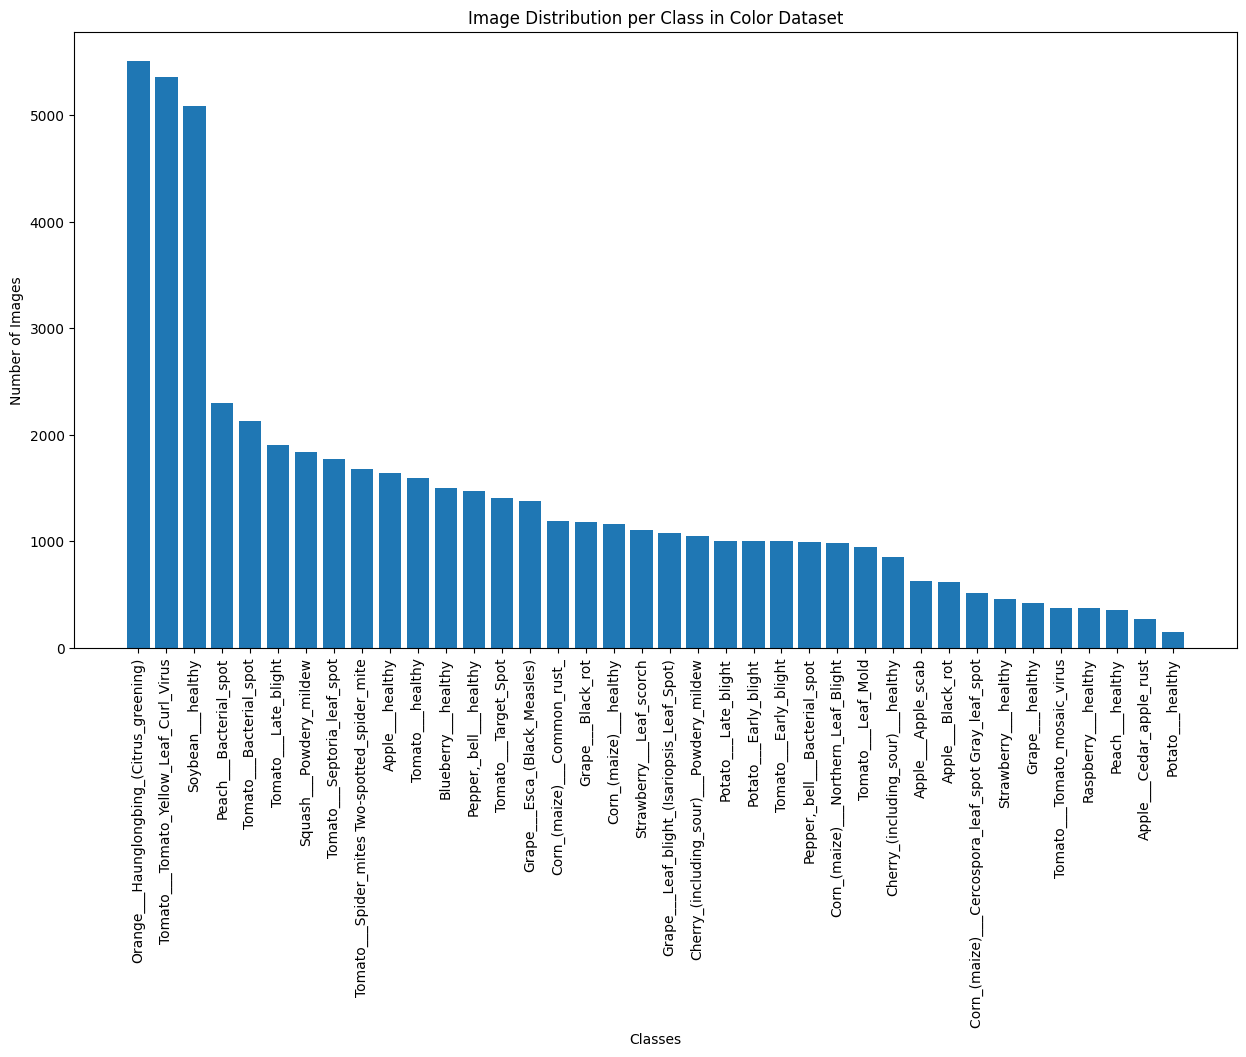

In [39]:
class_counts = {cls: len(os.listdir(os.path.join(color_dataset_path, cls)))
                for cls in os.listdir(color_dataset_path)}

class_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse = True))

# Bar chart
plt.figure(figsize = (15, 8))
plt.bar(range(len(class_counts)), list(class_counts.values()))
plt.xticks(range(len(class_counts)), list(class_counts.keys()), rotation = 90)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Image Distribution per Class in Color Dataset")
plt.show()

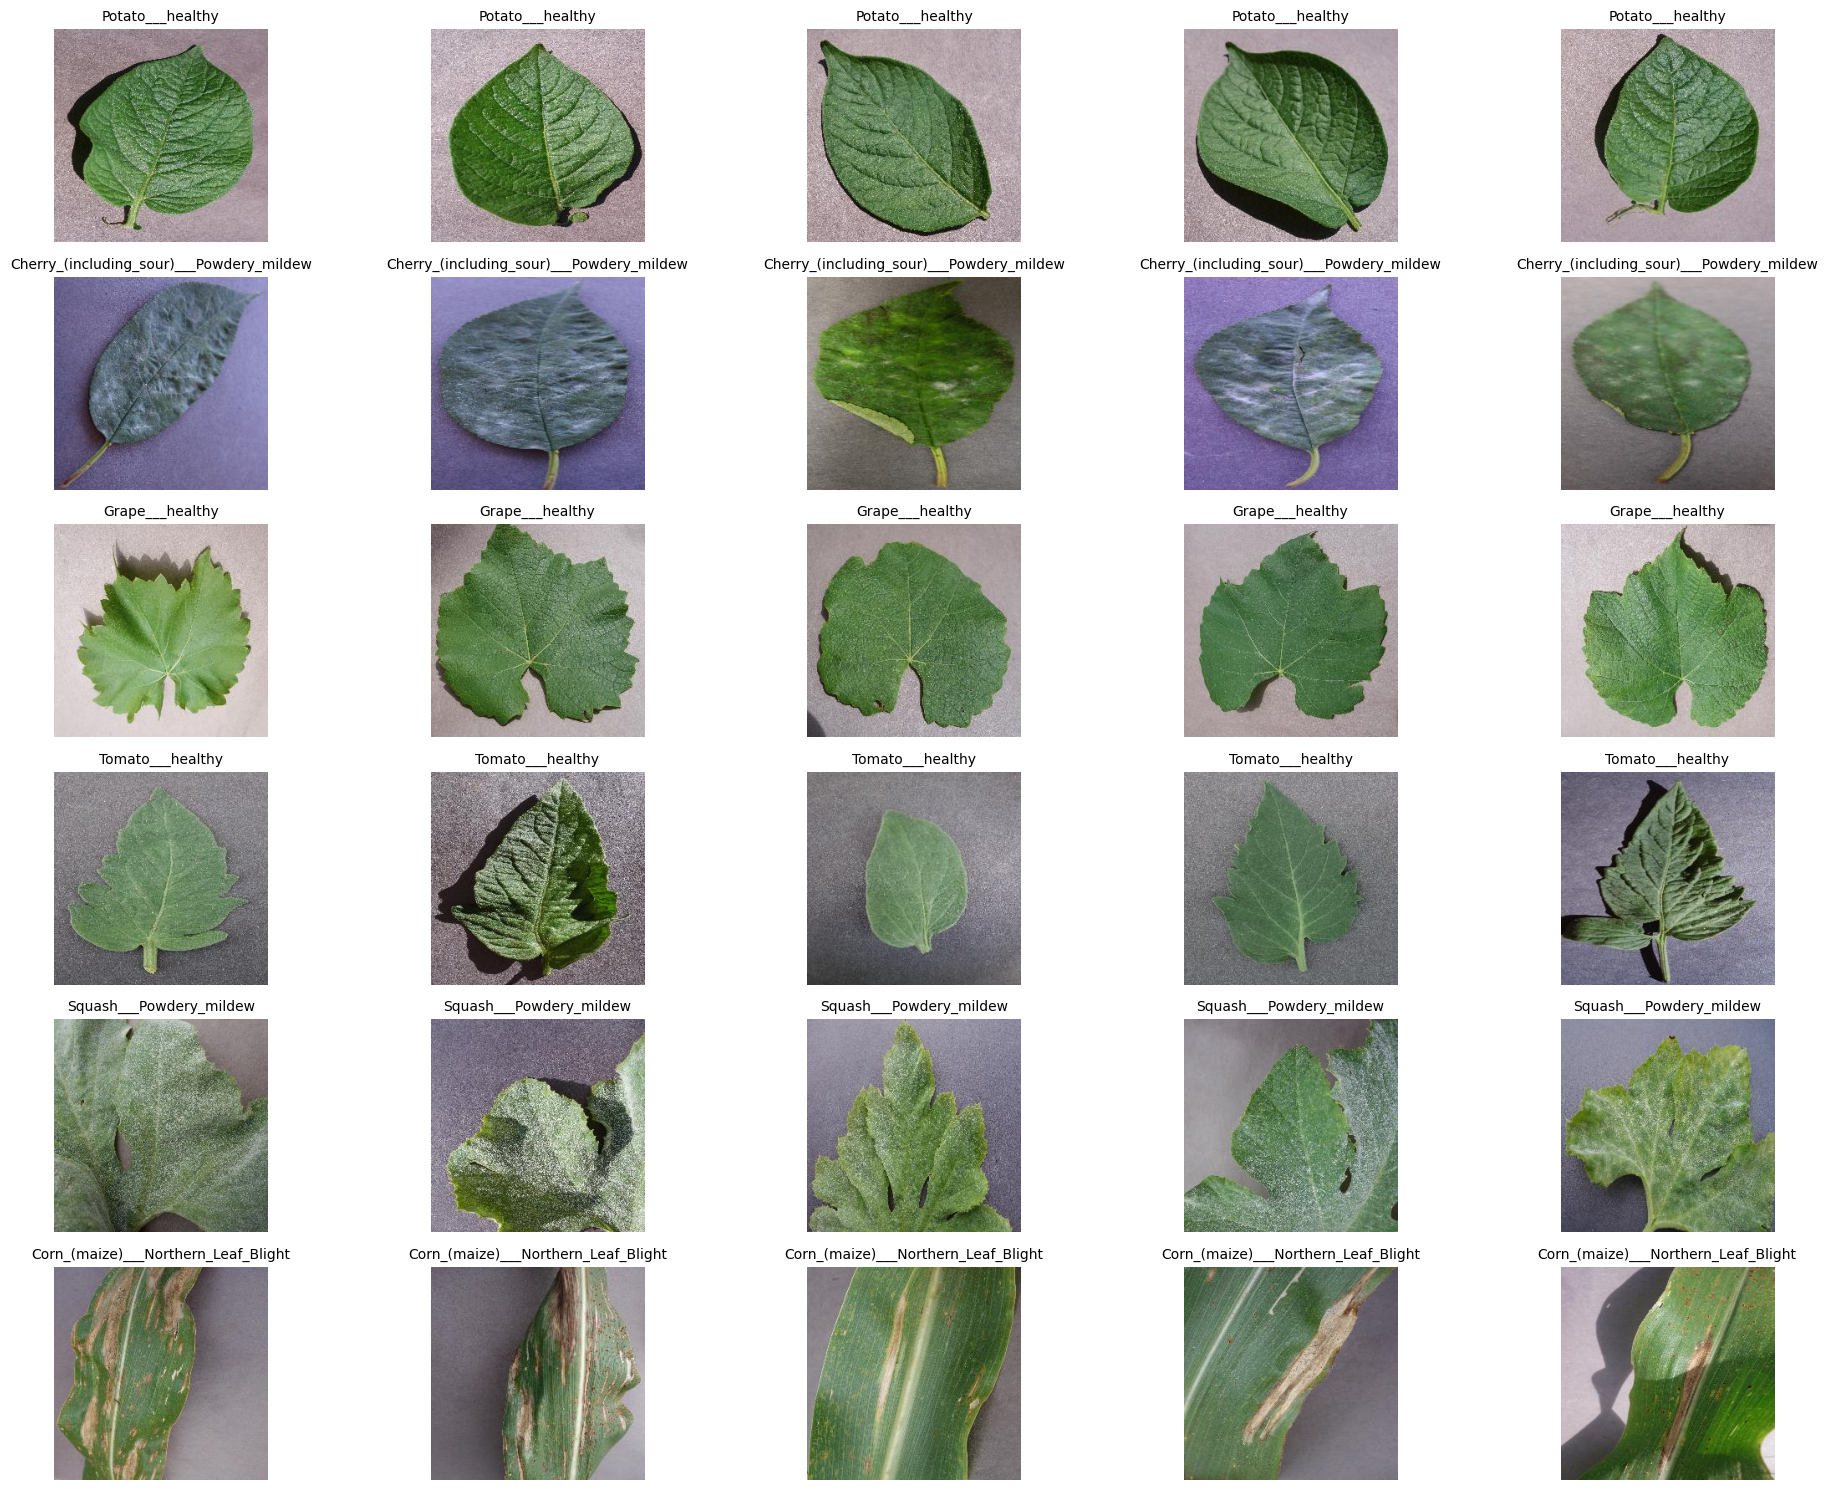

In [40]:
plt.figure(figsize=(20, 15))

# Pick 6 random classes
sample_classes = random.sample(os.listdir(color_dataset_path), 6)

for idx, cls in enumerate(sample_classes):
    class_path = os.path.join(color_dataset_path, cls)

    # Pick 5 random images from this class
    sample_images = random.sample(os.listdir(class_path), 5)

    for j, img_name in enumerate(sample_images):
        img_path = os.path.join(class_path, img_name)

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(len(sample_classes), 5, idx*5 + j + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(cls, fontsize = 10)

plt.tight_layout()
plt.show()

Dimensions of the image: (256, 256, 3)



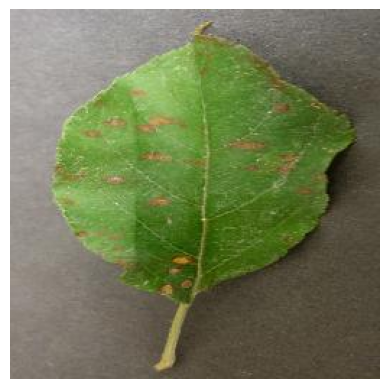

In [41]:
image_path = '/content/plantvillage dataset/color/Apple___Cedar_apple_rust/025b2b9a-0ec4-4132-96ac-7f2832d0db4a___FREC_C.Rust 3655.JPG'

# Read the image
img = mpimg.imread(image_path)

# Display the image
print(f"Dimensions of the image: {img.shape}\n")
plt.imshow(img)
plt.axis('off')
plt.show()

In [42]:
img = mpimg.imread(image_path)
print(img)

[[[179 175 176]
  [181 177 178]
  [184 180 181]
  ...
  [115 112 105]
  [108 105  98]
  [101  98  91]]

 [[176 172 173]
  [177 173 174]
  [178 174 175]
  ...
  [113 110 103]
  [111 108 101]
  [109 106  99]]

 [[180 176 177]
  [180 176 177]
  [180 176 177]
  ...
  [108 105  98]
  [111 108 101]
  [114 111 104]]

 ...

 [[137 128 119]
  [131 122 113]
  [125 116 107]
  ...
  [ 74  65  48]
  [ 74  65  48]
  [ 73  64  47]]

 [[136 127 118]
  [132 123 114]
  [128 119 110]
  ...
  [ 77  69  50]
  [ 75  67  48]
  [ 75  67  48]]

 [[133 124 115]
  [133 124 115]
  [132 123 114]
  ...
  [ 81  73  54]
  [ 80  72  53]
  [ 79  71  52]]]


In [43]:
# Image parameters

image_size = 224
batch_size = 32

In [44]:
# Image Data Generator

data_generator = ImageDataGenerator(
    rescale = 1./255, # Normalizes pixel values from [0, 255] → [0, 1].
    validation_split = 0.2 # Use 20% of data for validation
)

In [45]:
# Train Generator

# It'll automatically label the images as well
train_generator = data_generator.flow_from_directory(
    directory = color_dataset_path,
    target_size = (image_size, image_size),    # resizes all images to a fixed size
    batch_size = batch_size,    # number of images loaded per batch during training (increase this if you have more RAM)
    class_mode = 'categorical', # labels are returned as one-hot encoded vectors
    subset = 'training'         # generator should only use the 80% training portion
)

Found 43456 images belonging to 38 classes.


In [46]:
# Validation Generator

validation_generator = data_generator.flow_from_directory(
    directory = color_dataset_path,
    target_size = (image_size, image_size),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation' # generator should only use the 80% validation portion
)

Found 10849 images belonging to 38 classes.


In [47]:
# Sequential model → layers are stacked one after another in order.
model = models.Sequential()

# Adds a convolutional layer with 32 filters, each of size 3×3, Relu introduces non-linearity to learn complex patterns
model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (image_size, image_size, 3)))

# MaxPooling (2×2) downsamples the feature maps by taking the maximum value in each 2×2 block. Keeps only the most important features.
model.add(layers.MaxPooling2D((2, 2)))

# 64 filter deeper layers learn more abstract features (e.g., shapes, textures, disease patterns on leaves).
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))

# Another pooling layer → reduces feature map size again.
model.add(layers.MaxPooling2D(2, 2))

# Converts the 2D feature maps (height × width × channels) into a 1D vector.
# It is required before feeding into fully connected (dense) layers.
model.add(layers.Flatten())

# A fully connected layer with 256 neurons that learns high-level combinations of features
model.add(layers.Dense(256, activation = "relu"))

# Final output layer
model.add(layers.Dense(train_generator.num_classes, activation = "softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Compile the Model

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [50]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size, # Number of steps per epoch
    epochs = 5, # Number of epochs
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size # Validation steps
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 2695s 2s/step - accuracy: 0.6070 - loss: 1.5235 - val_accuracy: 0.8520 - val_loss: 0.4796
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 2782s 2s/step - accuracy: 0.9220 - loss: 0.2496 - val_accuracy: 0.8820 - val_loss: 0.3888
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 2700s 2s/step - accuracy: 0.9712 - loss: 0.0950 - val_accuracy: 0.8815 - val_loss: 0.4456
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 2770s 2s/step - accuracy: 0.9760 - loss: 0.0738 - val_accuracy: 0.8756 - val_loss: 0.5056
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 2721s 2s/step - accuracy: 0.9820 - loss: 0.0573 - val_accuracy: 0.8710 - val_loss: 0.5582


In [51]:
print("Evaluating the model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps = validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating the model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 171s 506ms/step - accuracy: 0.8717 - loss: 0.5630
Validation Accuracy: 87.11%


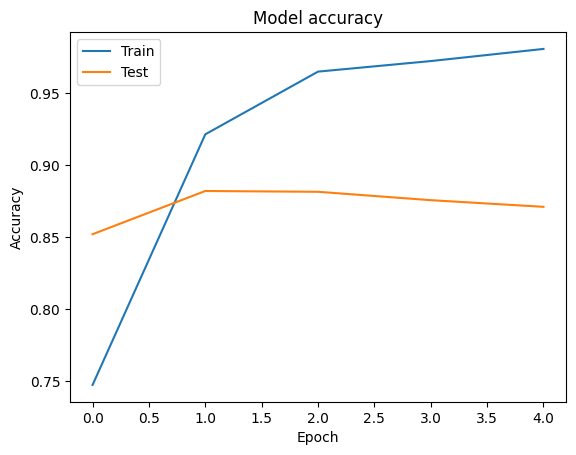

In [52]:
# Plotting training and validation accuracy values

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

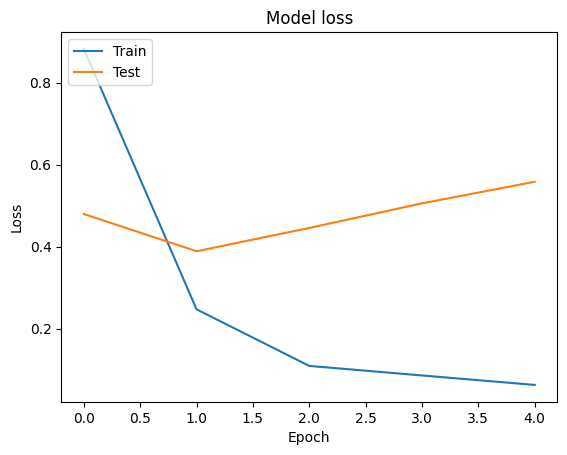

In [53]:
# Plotting training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [54]:
# Function to Load and Preprocess the Image using Pillow

def load_and_preprocess_image(image_path, target_size = (224, 224)):
    # Load the image
    img = Image.open(image_path)

    # Resize the image
    img = img.resize(target_size)

    # Convert the image to a numpy array
    img_array = np.array(img)

    # Add batch dimension
    img_array = np.expand_dims(img_array, axis = 0)

    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.

    return img_array

In [55]:
# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    # Preprocess the given imag
    preprocessed_img = load_and_preprocess_image(image_path)

    # Model outputs a probability distribution
    predictions = model.predict(preprocessed_img)

    # Finds the index of the highest probability
    predicted_class_index = np.argmax(predictions, axis = 1)[0]

    # Maps index back to the actual class name
    predicted_class_name = class_indices[predicted_class_index]

    return predicted_class_name

In [56]:
# A map from class indices to class names

class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [57]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

Error loading model: File not found: filepath=plant_disease_model.keras. Please ensure the file is an accessible `.keras` zip file.
Please ensure 'plant_disease_model.keras' is in the same directory.
Error loading class indices: [Errno 2] No such file or directory: 'class_indices.json'
Please ensure 'class_indices.json' is in the same directory.

Please upload an image of a plant leaf.


Saving Screenshot 2025-09-05 024714.png to Screenshot 2025-09-05 024714.png


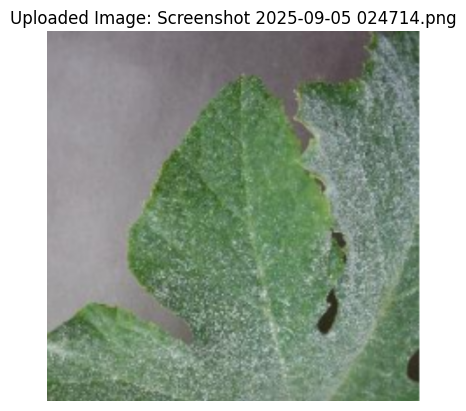

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step

Predicted Disease: Squash___Powdery_mildew
Confidence: 97.98%



In [61]:
import tensorflow as tf
import numpy as np
from PIL import Image
import json
from google.colab import files
import matplotlib.pyplot as plt
import io

# ==============================================================================
#   1. LOAD THE SAVED MODEL AND CLASS INDICES
# ==============================================================================
# Load the model you saved in the previous step
try:
    model = tf.keras.models.load_model('plant_disease_model.keras')
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")
    print("Please ensure 'plant_disease_model.keras' is in the same directory.")

# Load the class indices
try:
    with open('class_indices.json', 'r') as f:
        class_indices = json.load(f)
    # The JSON keys are strings, so we convert them to integers for mapping
    class_indices = {int(k): v for k, v in class_indices.items()}
    print("Class indices loaded successfully.")
except Exception as e:
    print(f"Error loading class indices: {e}")
    print("Please ensure 'class_indices.json' is in the same directory.")


# ==============================================================================
#   2. DEFINE HELPER FUNCTIONS FOR PREDICTION
#      (These are the same functions you created for training)
# ==============================================================================

def load_and_preprocess_image(image_bytes, target_size=(224, 224)):
    """
    Loads an image from bytes, preprocesses it, and prepares it for the model.
    """
    # Load the image from bytes using Pillow
    img = Image.open(io.BytesIO(image_bytes))

    # If the image has an alpha channel (e.g., PNG), convert it to RGB
    if img.mode != 'RGB':
        img = img.convert('RGB')

    # Resize the image
    img = img.resize(target_size)

    # Convert the image to a numpy array
    img_array = np.array(img)

    # Add a batch dimension (the model expects batches of images)
    img_array = np.expand_dims(img_array, axis=0)

    # Scale the image values from [0, 255] to [0, 1]
    img_array = img_array.astype('float32') / 255.0

    return img_array

def predict_image_class(model, image_bytes, class_indices):
    """
    Takes an image (in bytes), preprocesses it, and returns the predicted class name and confidence.
    """
    # Preprocess the image
    preprocessed_img = load_and_preprocess_image(image_bytes)

    # Get model predictions
    predictions = model.predict(preprocessed_img)

    # Find the index of the class with the highest probability
    predicted_class_index = np.argmax(predictions, axis=1)[0]

    # Get the confidence score of the prediction
    confidence = np.max(predictions, axis=1)[0]

    # Map the index back to the actual class name
    predicted_class_name = class_indices[predicted_class_index]

    return predicted_class_name, confidence


# ==============================================================================
#   3. CREATE THE INTERACTIVE UPLOAD AND PREDICTION CELL
# ==============================================================================

# This will create an upload button in the cell output
print("\nPlease upload an image of a plant leaf.")
uploaded = files.upload()

# Check if a file was uploaded
if len(uploaded) == 0:
    print("No file was uploaded. Please run the cell again.")
else:
    # Get the filename and the file content (bytes)
    filename = list(uploaded.keys())[0]
    image_bytes = uploaded[filename]

    # Display the uploaded image
    display_image = Image.open(io.BytesIO(image_bytes))
    plt.imshow(display_image)
    plt.title(f"Uploaded Image: {filename}")
    plt.axis('off')
    plt.show()

    # Make a prediction
    predicted_class, confidence = predict_image_class(model, image_bytes, class_indices)

    # Print the result
    print("\n" + "="*50)
    print(f"Predicted Disease: {predicted_class}")
    print(f"Confidence: {confidence * 100:.2f}%")
    print("="*50 + "\n")

In [62]:
# ==============================================================================
#   1. INSTALL GRADIO AND IMPORT LIBRARIES
# ==============================================================================
# Gradio is the library that will create our web UI
!pip install gradio -q

import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image
import json
import io

print(f"Gradio Version: {gr.__version__}")
print(f"TensorFlow Version: {tf.__version__}")

# ==============================================================================
#   2. LOAD THE SAVED MODEL AND CLASS INDICES
# ==============================================================================
# Load the trained model
try:
    model = tf.keras.models.load_model('plant_disease_model.keras')
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")
    print("Please ensure 'plant_disease_model.keras' is uploaded to the Colab session.")

# Load the class indices
try:
    with open('class_indices.json', 'r') as f:
        class_indices = json.load(f)
    # The JSON keys are strings, so we convert them to integers for mapping
    class_indices = {int(k): v for k, v in class_indices.items()}
    print("Class indices loaded successfully.")
except Exception as e:
    print(f"Error loading class indices: {e}")
    print("Please ensure 'class_indices.json' is uploaded to the Colab session.")


# ==============================================================================
#   3. DEFINE THE PREDICTION FUNCTION
#      This function takes an image as input and returns the model's prediction.
# ==============================================================================

def predict_disease(image):
    """
    This function takes a PIL image, preprocesses it, and returns a dictionary
    of the top predicted classes and their probabilities.
    """
    if image is None:
        return None

    # --- Preprocessing Steps (must match your training pipeline) ---

    # 1. If image has an alpha channel (e.g., PNG), convert it to RGB
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # 2. Resize the image to the size your model expects (e.g., 224x224)
    target_size = (224, 224)
    image = image.resize(target_size)

    # 3. Convert the image to a numpy array
    img_array = np.array(image)

    # 4. Add a batch dimension (the model expects batches of images)
    img_array = np.expand_dims(img_array, axis=0)

    # 5. Scale the image values from [0, 255] to [0, 1]
    img_array = img_array.astype('float32') / 255.0

    # --- Make Prediction ---
    predictions = model.predict(img_array)[0] # Get probabilities for the single image

    # --- Format the Output ---
    # Create a dictionary of {class_name: probability}
    confidences = {class_indices[i]: float(predictions[i]) for i in range(len(predictions))}

    return confidences


# ==============================================================================
#   4. CREATE AND LAUNCH THE GRADIO INTERFACE
# ==============================================================================

# Define the input component (drag-and-drop image upload)
input_image = gr.Image(
    type="pil",
    label="Upload an image...",
    sources=["upload", "webcam", "clipboard"]
)

# Define the output component (a label that shows top predictions)
output_label = gr.Label(
    num_top_classes=3,
    label="Prediction Results"
)

# Create the Gradio interface
demo = gr.Interface(
    fn=predict_disease,
    inputs=input_image,
    outputs=output_label,
    title="🌿 Plant Disease Classifier",
    description="Upload an image of a plant leaf to classify its disease. This model can identify 38 different plant diseases and healthy leaves.",
    article="Model trained on the PlantVillage dataset. Drag and drop a file or click to browse.",
    examples=[
        # You can add paths to example images if you upload them
        # ["path/to/your/example_apple_scab.jpg"],
        # ["path/to/your/example_tomato_healthy.jpg"]
    ]
)

# Launch the interface! It will appear directly in the Colab output cell.
# inline=True embeds it in the notebook, share=True creates a temporary public link.
demo.launch(inline=True, share=True)

Gradio Version: 5.44.1
TensorFlow Version: 2.19.0
Error loading model: File not found: filepath=plant_disease_model.keras. Please ensure the file is an accessible `.keras` zip file.
Please ensure 'plant_disease_model.keras' is uploaded to the Colab session.
Error loading class indices: [Errno 2] No such file or directory: 'class_indices.json'
Please ensure 'class_indices.json' is uploaded to the Colab session.
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8978eefc3d6e6602db.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
